In [1]:
# Libraries
import pandas as pd

In [2]:
# Import data
data = pd.read_csv(r'C:\Users\Suzana\Downloads\Motor_Vehicle_Collisions_-_Crashes (2).csv')

C:\Users\Suzana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# Data dimensions
data.shape

(1908970, 29)

In [8]:
# Checking overall data
data.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [9]:
# Columns Names
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [10]:
# Identifying possible nomeclatures used for bicycles
for i in range(1,5):
    print([x for x in data['VEHICLE TYPE CODE {}'.format(i)].unique() if (str(x).startswith('Bi')|
                                                                          str(x).startswith('BK')|
                                                                          str(x).startswith('BI')|
                                                                          str(x).startswith('Bk')|
                                                                          str(x).startswith('bK')|
                                                                          str(x).startswith('bk')|
                                                                          str(x).startswith('bi')|
                                                                          str(x).startswith('bI'))])


['Bike', 'BICYCLE', 'BK', 'Bicyc', 'BICYC', 'BKHOE']
['Bike', 'BK', 'big r', 'BICYCLE']
['Bike', 'BICYCLE']
['Bike', 'BICYCLE']


In [12]:
# Terms found for bicycle
terms = ['Bike','BK','Bicyc','BICYCLE','BICYC']

In [13]:
# Filtering for collisions involving bicycles
data_filter_all = data[(data['VEHICLE TYPE CODE 1'].isin(terms))|(data['VEHICLE TYPE CODE 2'].isin(terms))|
                      (data['VEHICLE TYPE CODE 3'].isin(terms))|(data['VEHICLE TYPE CODE 4'].isin(terms))|
                      (data['NUMBER OF CYCLIST INJURED']>0)|(data['NUMBER OF CYCLIST KILLED']>0)]

In [14]:
# Filtering by only collisions with bicycles injured or killed
data_filter_ik = data[(data['NUMBER OF CYCLIST INJURED']>0)|(data['NUMBER OF CYCLIST KILLED']>0)]

In [15]:
# Filtered data sets dimensions
data_filter_all.shape, data_filter_ik.shape

((59515, 29), (46644, 29))

In [16]:
data_filter_all.sample(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
32589,04/07/2021,20:20,QUEENS,11103,40.758690,-73.911500,"(40.75869, -73.9115)",31 AVENUE,47 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4406423,Sedan,Bike,NaN,NaN,NaN
1455541,08/30/2014,0:58,MANHATTAN,10001,40.757021,-74.004927,"(40.7570213, -74.004927)",WEST 34 STREET,JOE DIMAGGIO HIGHWAY,NaN,...,Unspecified,NaN,NaN,NaN,1016272,UNKNOWN,BICYCLE,NaN,NaN,NaN
372560,06/22/2019,21:05,BROOKLYN,11235,40.584800,-73.931170,"(40.5848, -73.93117)",NaN,NaN,2840 KNAPP STREET,...,NaN,NaN,NaN,NaN,4156616,Bike,NaN,NaN,NaN,NaN


### Following snippets are for previous project

In [12]:
data_filter_all['year'] = pd.to_datetime(data_filter_all['CRASH DATE']).dt.year
data_filter_ik['year'] = pd.to_datetime(data_filter_ik['CRASH DATE']).dt.year

C:\Users\Suzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Suzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
data_byYear = data_filter_all.groupby('year').count()['CRASH DATE']
data_byYear = data_byYear[(data_byYear.index<=2022) & (data_byYear.index>2019)]

In [14]:
data_filter_all[(data_filter_all['year']<=2022)&(data_filter_all['year']>2019)][['NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','year']].groupby('year').describe().T.to_csv('071122_trb23_descriptives_collision2019-2022.csv')

In [15]:
data_filter_all[(data_filter_all['year']<=2022)&(data_filter_all['year']>2019)][['NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','year']].describe().T

,count,mean,std,min,25%,50%,75%,max
NUMBER OF CYCLIST INJURED,15168.0,0.839003,0.408007,0.0,1.0,1.0,1.0,3.0
NUMBER OF CYCLIST KILLED,15168.0,0.003758,0.061189,0.0,0.0,0.0,0.0,1.0
year,15168.0,2020.744528,0.735693,2020.0,2020.0,2021.0,2021.0,2022.0


In [16]:
data_filter_ik[(data_filter_ik['year']<=2022)&(data_filter_ik['year']>2019)][['NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','year']].describe().T

,count,mean,std,min,25%,50%,75%,max
NUMBER OF CYCLIST INJURED,12551.0,1.013943,0.154239,0.0,1.0,1.0,1.0,3.0
NUMBER OF CYCLIST KILLED,12551.0,0.004541,0.067240,0.0,0.0,0.0,0.0,1.0
year,12551.0,2020.736037,0.734819,2020.0,2020.0,2021.0,2021.0,2022.0


In [17]:
data_filter_all.tail()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,year
1907521,07/09/2012,17:37,BROOKLYN,11222,40.720601,-73.954754,"(40.7206006, -73.9547539)",BEDFORD AVENUE,NORTH 12 STREET,NaN,...,NaN,NaN,NaN,198192,TAXI,BICYCLE,NaN,NaN,NaN,2012
1907542,07/02/2012,9:46,MANHATTAN,10002,40.717724,-73.985765,"(40.7177239, -73.9857652)",DELANCEY STREET,CLINTON STREET,NaN,...,NaN,NaN,NaN,12187,PICK-UP TRUCK,BICYCLE,NaN,NaN,NaN,2012
1907610,07/07/2012,18:40,NaN,NaN,40.867335,-73.822707,"(40.8673349, -73.8227066)",NaN,NaN,NaN,...,NaN,NaN,NaN,2912116,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,2012
1907611,07/06/2012,13:33,BROOKLYN,11209,40.625780,-74.024154,"(40.6257805, -74.0241544)",5 AVENUE,80 STREET,NaN,...,NaN,NaN,NaN,140835,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,2012
1907643,07/02/2012,0:21,BROOKLYN,11218,40.636133,-73.972736,"(40.6361331, -73.9727361)",DITMAS AVENUE,OCEAN PARKWAY,NaN,...,NaN,NaN,NaN,129911,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,2012


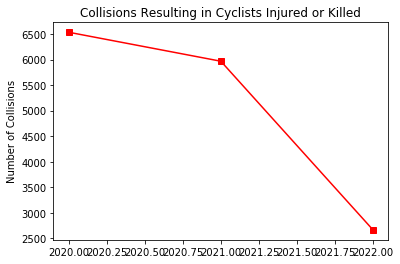

In [18]:
import matplotlib.pyplot as plt

plt.plot(data_byYear.index, data_byYear, color = 'red', marker='s')

plt.title("Collisions Resulting in Cyclists Injured or Killed")

plt.ylabel("Number of Collisions")

plt.show()

In [19]:
# data_filter_all.to_csv('071122_bike_collision_v2.csv')

In [21]:
# data_filter[(data_filter['year']<2022)&(data_filter['year']>2012)][['NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','year']].groupby('year').sum()

In [22]:
# data_out

In [23]:
data_out = data_filter_all[['NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','year','LATITUDE','LONGITUDE']]

In [24]:
data_out.to_csv(r'C:\Users\Suzana\Dropbox\Suzana_Bernardes\Papers\2022-TRB\Data\071422_trb23_collisions_v3.csv')

In [26]:
data_out1 = data_filter_all[data_filter_all['year']<2019][['NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','year','LATITUDE','LONGITUDE']]

In [27]:
data_out1.to_csv(r'C:\Users\Suzana\Dropbox\Suzana_Bernardes\Papers\2022-TRB\Data\071522_trb23_collisions2012-2018_v3.csv')

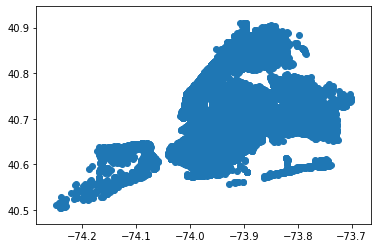

In [25]:
plt.scatter(x='LONGITUDE',y='LATITUDE',data=data_out[data_out['LATITUDE']>0])

In [ ]:
data_out